In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [2]:
import io
%cd "C:\Users\sadin\Desktop\IMARTICUS\CAPSTONE PROJECT - ML"

C:\Users\sadin\Desktop\IMARTICUS\CAPSTONE PROJECT - ML


In [3]:
lendingclub=pd.read_csv("lending_club_loans.csv",low_memory=False)

In [4]:
lendingclub.shape

(42538, 115)

In [5]:
lendingclub.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 115 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              42536 non-null  object 
 1    member_id                       42535 non-null  float64
 2    loan_amnt                       42535 non-null  float64
 3    funded_amnt                     42535 non-null  float64
 4    funded_amnt_inv                 42535 non-null  float64
 5    term                            42535 non-null  object 
 6    int_rate                        42535 non-null  object 
 7    installment                     42535 non-null  float64
 8    grade                           42535 non-null  object 
 9    sub_grade                       42535 non-null  object 
 10   emp_title                       39909 non-null  object 
 11   emp_length                      41423 non-null  object 
 12   home_ownership  

In [6]:
pd.set_option('display.max_columns', None)
lendingclub.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   
2   15.96%        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   
2     12252.0        Not Verified  Dec-11   Fully Paid          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
0           Jan-85           735.0            739.0             1.0   
1           Apr-99           740.0            744.0             5.0   
2           Nov-01           735.0            739.0             2.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   
2                     NaN                     NaN       2.0      0.0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0    13648.0     83.70%        9.0                   f        0.0   
1     1687.0      9.40%        4.0                   f        0.0   
2     2956.0     98.50%       10.0                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5863.155187          5833.84          5000.00   
1            0.0  1008.710000          1008.71           456.46   
2            0.0  3005.666844          3005.67          2400.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   
2         605.67                 0.0        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             Sep-16   
1       Apr-13           119.66          NaN             Sep-16   
2       Jun-14           649.91          NaN             Sep-16   

   last_fico_range_high  last_fico_range_low  collections_12_mths_ex_med  \
0                 744.0                740.0                         0.0   
1                 499.0                  0.0                         0.0   
2                 719.0                715.0                         0.0   

   mths_since_last_major_derog  policy_code application_type  \
0                          NaN          1.0       INDIVIDUAL   
1                          NaN          1.0       INDIVIDUAL   
2                          NaN          1.0       INDIVIDUAL   

   annual_inc_joint  dti_joint  verification_status_joint 

In [7]:
# checking the number of number values
pd.set_option("display.max_rows", None)
lendingclub.isnull().sum().sort_values(ascending=False)
# we can see that the data contains a lot of columns with missing values and some of the columns have 100% missing values

annual_inc_joint                  42538
mo_sin_rcnt_rev_tl_op             42538
mo_sin_old_il_acct                42538
bc_util                           42538
bc_open_to_buy                    42538
avg_cur_bal                       42538
acc_open_past_24mths              42538
inq_last_12m                      42538
total_cu_tl                       42538
inq_fi                            42538
total_rev_hi_lim                  42538
all_util                          42538
max_bal_bc                        42538
open_rv_24m                       42538
open_rv_12m                       42538
il_util                           42538
total_bal_il                      42538
mths_since_rcnt_il                42538
open_il_24m                       42538
open_il_12m                       42538
open_il_6m                        42538
open_acc_6m                       42538
tot_cur_bal                       42538
tot_coll_amt                      42538
verification_status_joint         42538


In [8]:
# getting the percentage of null values 
lendingclub.isnull().sum().sort_values(ascending=False)/lendingclub.shape[0]

annual_inc_joint                  1.000000
mo_sin_rcnt_rev_tl_op             1.000000
mo_sin_old_il_acct                1.000000
bc_util                           1.000000
bc_open_to_buy                    1.000000
avg_cur_bal                       1.000000
acc_open_past_24mths              1.000000
inq_last_12m                      1.000000
total_cu_tl                       1.000000
inq_fi                            1.000000
total_rev_hi_lim                  1.000000
all_util                          1.000000
max_bal_bc                        1.000000
open_rv_24m                       1.000000
open_rv_12m                       1.000000
il_util                           1.000000
total_bal_il                      1.000000
mths_since_rcnt_il                1.000000
open_il_24m                       1.000000
open_il_12m                       1.000000
open_il_6m                        1.000000
open_acc_6m                       1.000000
tot_cur_bal                       1.000000
tot_coll_am

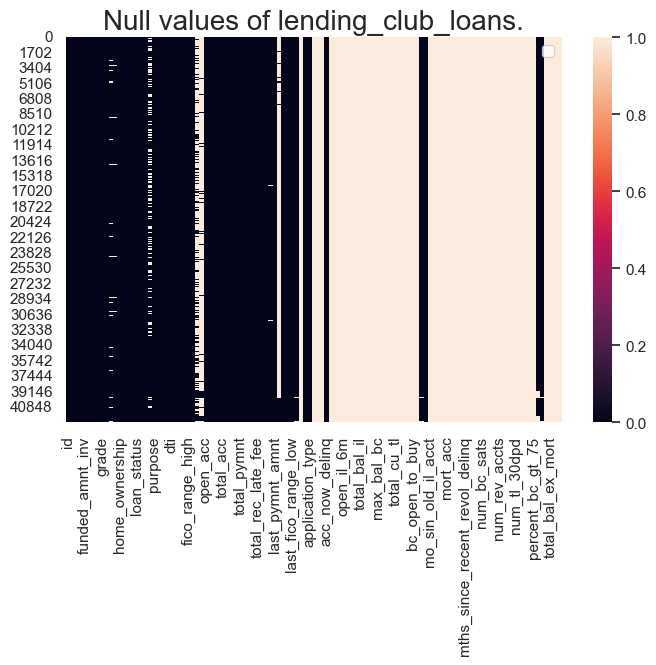

In [9]:
# plotting a plot for missing values
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.heatmap(lendingclub.isnull())
plt.title('Null values of lending_club_loans.',fontdict={'fontsize': 20})
plt.legend(lendingclub.isnull())
plt.show()

In [10]:
# creating a data frame to understange percentage of missing values
percent_missing = pd.DataFrame()
percent_missing['Percentage of null values']=['10% or less','20% or less','30% or less','40% or less','50% or less',
                                '60% or less','70% or less','80% or less','90% or less','100% or less']
ten_percent = len(lendingclub.columns[((lendingclub.isnull().sum())/len(lendingclub)) < 0.1])
twenty_percent = len(lendingclub.columns[((lendingclub.isnull().sum())/len(lendingclub)) < 0.2])
thirty_percent = len(lendingclub.columns[((lendingclub.isnull().sum())/len(lendingclub)) < 0.3])
fourty_percent = len(lendingclub.columns[((lendingclub.isnull().sum())/len(lendingclub)) < 0.4])
fifty_percent = len(lendingclub.columns[((lendingclub.isnull().sum())/len(lendingclub)) < 0.5])
sixty_percent = len(lendingclub.columns[((lendingclub.isnull().sum())/len(lendingclub)) < 0.6])
seventy_percent = len(lendingclub.columns[((lendingclub.isnull().sum())/len(lendingclub)) < 0.7])
eighty_percent = len(lendingclub.columns[((lendingclub.isnull().sum())/len(lendingclub)) < 0.8])
ninety_percent = len(lendingclub.columns[((lendingclub.isnull().sum())/len(lendingclub)) < 0.9])
hundred_percent = len(lendingclub.columns[((lendingclub.isnull().sum())/len(lendingclub)) < 1.0])
percent_missing['No.of columns'] = [ten_percent,twenty_percent,thirty_percent,fourty_percent,fifty_percent,
                                    sixty_percent,seventy_percent,eighty_percent,ninety_percent,hundred_percent]
percent_missing

Percentage of null values  No.of columns
0               10% or less             57
1               20% or less             57
2               30% or less             57
3               40% or less             58
4               50% or less             58
5               60% or less             58
6               70% or less             59
7               80% or less             59
8               90% or less             59
9              100% or less             61

In [11]:
# selecting the columns with missing values less than 60%
lendingclub = lendingclub[lendingclub.columns[((lendingclub.isnull().sum())/len(lendingclub)) < 0.6]]
lendingclub.shape

(42538, 58)

In [12]:
# after removing the columns with null values less than 60% the features are reduced from 115 to 58

In [13]:
lendingclub.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   
3  1076863  1277178.0    10000.0      10000.0          10000.0   36 months   
4  1075358  1311748.0     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  open_acc  \
0           Jan-85           735.0            739.0             1.0       3.0   
1           Apr-99           740.0            744.0             5.0       3.0   
2           Nov-01           735.0            739.0             2.0       2.0   
3           Feb-96           690.0            694.0             1.0      10.0   
4           Jan-96           695.0            699.0             0.0      15.0   

   pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      0.0    13648.0     83.70%        9.0                   f       0.00   
1      0.0     1687.0      9.40%        4.0                   f       0.00   
2      0.0     2956.0     98.50%       10.0                   f       0.00   
3      0.0     5598.0        21%       37.0                   f       0.00   
4      0.0    27783.0     53.90%       38.0                   f     270.78   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00   5863.155187          5833.84          5000.00   
1           0.00   1008.710000          1008.71           456.46   
2           0.00   3005.666844          3005.67          2400.00   
3           0.00  12231.890000         12231.89         10000.00   
4         270.78   3784.490000          3784.49          2729.22   

   total_rec_in

In [14]:
# seperating the data into object cols and numeric cols
objectcols=lendingclub.select_dtypes(include="object")
numericcols=lendingclub.select_dtypes(include=np.number)

In [15]:
print(objectcols.info())
print("===================================================================")
print(numericcols.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   42536 non-null  object
 1   term                 42535 non-null  object
 2   int_rate             42535 non-null  object
 3   grade                42535 non-null  object
 4   sub_grade            42535 non-null  object
 5   emp_title            39909 non-null  object
 6   emp_length           41423 non-null  object
 7   home_ownership       42535 non-null  object
 8   verification_status  42535 non-null  object
 9   issue_d              42535 non-null  object
 10  loan_status          42535 non-null  object
 11  pymnt_plan           42535 non-null  object
 12  url                  42535 non-null  object
 13  desc                 29242 non-null  object
 14  purpose              42535 non-null  object
 15  title                42522 non-null  object
 16  zip_

In [16]:
objectcols.head(10)

id        term int_rate grade sub_grade                  emp_title  \
0  1077501   36 months   10.65%     B        B2                        NaN   
1  1077430   60 months   15.27%     C        C4                      Ryder   
2  1077175   36 months   15.96%     C        C5                        NaN   
3  1076863   36 months   13.49%     C        C1        AIR RESOURCES BOARD   
4  1075358   60 months   12.69%     B        B5   University Medical Group   
5  1075269   36 months    7.90%     A        A4       Veolia Transportaton   
6  1069639   60 months   15.96%     C        C5  Southern Star Photography   
7  1072053   36 months   18.64%     E        E1            MKC Accounting    
8  1071795   60 months   21.28%     F        F2                        NaN   
9  1071570   60 months   12.69%     B        B5                  Starbucks   

  emp_length home_ownership verification_status issue_d  loan_status  \
0  10+ years           RENT            Verified  Dec-11   Fully Paid   
1   < 1 year           RENT     Source Verified  Dec-11  Charged Off   
2  10+ years           RENT        Not Verified  Dec-11   Fully Paid   
3  10+ years           RENT     Source Verified  Dec-11   Fully Paid   
4     1 year           RENT     Source Verified  Dec-11      Current   
5    3 years           RENT     Source Verified  Dec-11   Fully Paid   
6    8 years           RENT        Not Verified  Dec-11   Fully Paid   
7    9 years           RENT     Source Verified  Dec-11   Fully Paid   
8    4 years            OWN     Source Verified  Dec-11  Charged Off   
9   < 1 year           RENT            Verified  Dec-11  Charged Off   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   
6          n  https://lendingclub.com/browse/loanDetail.acti...   
7          n  https://lendingclub.com/browse/loanDetail.acti...   
8          n  https://lendingclub.com/browse/loanDetail.acti...   
9          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc             purpose  \
0    Borrower added on 12/22/11 > I need to upgra...         credit_card   
1    Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                NaN      small_business   
3    Borrower added on 12/21/11 > to pay for prop...               other   
4    Borrower added on 12/21/11 > I plan on combi...               other   
5                                                NaN             wedding   
6    Borrower added on 12/18/11 > I am planning o...  debt_consolidation   
7    Borrower added on 12/16/11 > Downpayment for...                 car   
8    Borrower added on 12/21/11 > I own a small h...      small_business   
9    Borrower added on 12/16/11 > I'm trying to b...               other   

                                   title zip_code addr_state earliest_cr_line  \
0                               Computer    860xx         AZ           Jan-85   
1                                   bike    309xx         GA           Apr-99   
2                   real estate business    606xx         IL           Nov-01   
3                               personel    917xx         CA           Feb-96   
4                               Personal    972xx         OR           Jan-96   
5  My wedding loan I promise to pay back    852xx         AZ           Nov-04   
6                                   Loan    280xx         NC           Jul-05   
7                        Car Downpayment    900xx         CA           Jan-07   
8   Expand Business & Buy Debt Portfolio    958xx   

In [17]:
for i in objectcols.columns:
    print(objectcols[i].value_counts())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64
Dec-11    2267
Nov-11    2232
Oct-11    2118
Sep-11    2067
Aug-11    1934
Jul-11    1875
Jun-11    1835
May-11    1704
Apr-11    1563
Mar-11    1448
Jan-11    1380
Dec-10    1335
Feb-11    1298
Oct-10    1232
Nov-10    1224
Jul-10    1204
Sep-10    1189
Aug-10    1175
Jun-10    1105
May-10     989
Apr-10     912
Mar-10     828
Feb-10     682
Jan-10     662
Nov-09     662
Dec-09     658
Oct-09     604
Sep-09     507
Aug-09     446
Jul-09     411
Jun-09     406
Mar-08     402
May-09     359
Apr-09     333
Mar-09     324
Feb-08     306
Jan-08     305
Feb-09     302
Jan-09     269
Apr-08     259
Dec-08     253
Nov-08     209
Dec-07     172
Jul-08     141
Jun-08     124
Oct-08     122
May-08     115
Nov-07     112
Oct-07     105
Aug-08     100
Aug-07      74
Jul-07      63
Sep-08      57
Sep-07      53
Jun-07      24
Name: issue_d, dtype: int64
Fully Paid                      

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
# after examining the object cols the following columns are removed from the data which doesnt add value to our data
objectcols=objectcols.drop(["id","emp_title","pymnt_plan","url","desc","title","zip_code","addr_state"
                           ,"earliest_cr_line","revol_util","last_pymnt_d","last_credit_pull_d","initial_list_status","application_type"],axis=1)

In [19]:
objectcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 42535 non-null  object
 1   int_rate             42535 non-null  object
 2   grade                42535 non-null  object
 3   sub_grade            42535 non-null  object
 4   emp_length           41423 non-null  object
 5   home_ownership       42535 non-null  object
 6   verification_status  42535 non-null  object
 7   issue_d              42535 non-null  object
 8   loan_status          42535 non-null  object
 9   purpose              42535 non-null  object
dtypes: object(10)
memory usage: 3.2+ MB


In [20]:
for i in numericcols.columns:
    print(numericcols[i].value_counts())

1296599.0    1
694920.0     1
697615.0     1
697589.0     1
697502.0     1
697569.0     1
697578.0     1
697460.0     1
697062.0     1
697353.0     1
697326.0     1
697402.0     1
697401.0     1
695730.0     1
697348.0     1
696642.0     1
697313.0     1
696497.0     1
661324.0     1
697640.0     1
697663.0     1
684268.0     1
697429.0     1
698009.0     1
697319.0     1
697953.0     1
697947.0     1
697936.0     1
697878.0     1
697882.0     1
697871.0     1
696362.0     1
697707.0     1
688092.0     1
696033.0     1
682134.0     1
697646.0     1
697734.0     1
696944.0     1
696949.0     1
697260.0     1
697130.0     1
693418.0     1
696771.0     1
694248.0     1
677244.0     1
696744.0     1
696778.0     1
696779.0     1
696765.0     1
696343.0     1
695530.0     1
694667.0     1
694138.0     1
696677.0     1
696521.0     1
696653.0     1
696640.0     1
695974.0     1
696614.0     1
696613.0     1
695482.0     1
696870.0     1
689628.0     1
696882.0     1
697127.0     1
697028.0  

In [21]:
numericcols.head(10)

member_id  loan_amnt  funded_amnt  funded_amnt_inv  installment  \
0  1296599.0     5000.0       5000.0           4975.0       162.87   
1  1314167.0     2500.0       2500.0           2500.0        59.83   
2  1313524.0     2400.0       2400.0           2400.0        84.33   
3  1277178.0    10000.0      10000.0          10000.0       339.31   
4  1311748.0     3000.0       3000.0           3000.0        67.79   
5  1311441.0     5000.0       5000.0           5000.0       156.46   
6  1304742.0     7000.0       7000.0           7000.0       170.08   
7  1288686.0     3000.0       3000.0           3000.0       109.43   
8  1306957.0     5600.0       5600.0           5600.0       152.39   
9  1306721.0     5375.0       5375.0           5350.0       121.45   

   annual_inc    dti  delinq_2yrs  fico_range_low  fico_range_high  \
0     24000.0  27.65          0.0           735.0            739.0   
1     30000.0   1.00          0.0           740.0            744.0   
2     12252.0   8.72          0.0           735.0            739.0   
3     49200.0  20.00          0.0           690.0            694.0   
4     80000.0  17.94          0.0           695.0            699.0   
5     36000.0  11.20          0.0           730.0            734.0   
6     47004.0  23.51          0.0           690.0            694.0   
7     48000.0   5.35          0.0           660.0            664.0   
8     40000.0   5.55          0.0           675.0            679.0   
9     15000.0  18.08          0.0           725.0            729.0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  total_acc  out_prncp  \
0             1.0       3.0      0.0    13648.0        9.0       0.00   
1             5.0       3.0      0.0     1687.0        4.0       0.00   
2             2.0       2.0      0.0     2956.0       10.0       0.00   
3             1.0      10.0      0.0     5598.0       37.0       0.00   
4             0.0      15.0      0.0    27783.0       38.0     270.78   
5             3.0       9.0      0.0     7963.0       12.0       0.00   
6             1.0       7.0      0.0    17726.0       11.0       0.00   
7             2.0       4.0      0.0     8221.0        4.0       0.00   
8             2.0      11.0      0.0     5210.0       13.0       0.00   
9             0.0       2.0      0.0     9279.0        3.0       0.00   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00   5863.155187          5833.84          5000.00   
1           0.00   1008.710000          1008.71           456.46   
2           0.00   3005.666844          3005.67          2400.00   
3           0.00  12231.890000         12231.89         10000.00   
4         270.78   3784.490000          3784.49          2729.22   
5           0.00   5632.210000          5632.21          5000.00   
6           0.00  10137.840010         10137.84          7000.00   
7           0.00   3939.135294          3939.14          3000.00   
8           0.00    646.020000           646.02           162.02   
9           0.00   1476.190000          1469.34           673.48   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1055.27                0.00        0.00                     0.00   
5         632.21                0.00        0.00                     0.00   
6        3137.84                0.00        0.00                     0.00   
7         939.14                0.00        0.00                     0.00   
8         294.94                0.00      189.06                     2.09   
9         533.42                0.00      269.29                     2.52   

   last_pymnt_amnt  last_fico_range_high  last_fico_range_lo

In [22]:
numericcols.pub_rec.value_counts()

0.0    40130
1.0     2298
2.0       64
3.0       11
4.0        2
5.0        1
Name: pub_rec, dtype: int64

In [23]:
# there are some single value columns and non usefull columns in numericcols
# we are removing them from the data frame
numericcols=numericcols.drop(["tax_liens","chargeoff_within_12_mths","collections_12_mths_ex_med","policy_code","collection_recovery_fee","recoveries",
                              "member_id","pub_rec_bankruptcies","pub_rec","open_acc","delinq_amnt","delinq_2yrs","revol_bal","inq_last_6mths","out_prncp",
                              "out_prncp_inv","last_pymnt_amnt","acc_now_delinq"],axis=1)

In [24]:
numericcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42535 non-null  float64
 1   funded_amnt           42535 non-null  float64
 2   funded_amnt_inv       42535 non-null  float64
 3   installment           42535 non-null  float64
 4   annual_inc            42531 non-null  float64
 5   dti                   42535 non-null  float64
 6   fico_range_low        42535 non-null  float64
 7   fico_range_high       42535 non-null  float64
 8   total_acc             42506 non-null  float64
 9   total_pymnt           42535 non-null  float64
 10  total_pymnt_inv       42535 non-null  float64
 11  total_rec_prncp       42535 non-null  float64
 12  total_rec_int         42535 non-null  float64
 13  total_rec_late_fee    42535 non-null  float64
 14  last_fico_range_high  42535 non-null  float64
 15  last_fico_range_low

In [25]:
objectcols.head()

term int_rate grade sub_grade emp_length home_ownership  \
0   36 months   10.65%     B        B2  10+ years           RENT   
1   60 months   15.27%     C        C4   < 1 year           RENT   
2   36 months   15.96%     C        C5  10+ years           RENT   
3   36 months   13.49%     C        C1  10+ years           RENT   
4   60 months   12.69%     B        B5     1 year           RENT   

  verification_status issue_d  loan_status         purpose  
0            Verified  Dec-11   Fully Paid     credit_card  
1     Source Verified  Dec-11  Charged Off             car  
2        Not Verified  Dec-11   Fully Paid  small_business  
3     Source Verified  Dec-11   Fully Paid           other  
4     Source Verified  Dec-11      Current           other

In [26]:
objectcols['int_rate'] = objectcols['int_rate'].str.rstrip('%').astype('float') 

In [27]:
numericcols["int_rate"]=objectcols.int_rate

In [28]:
objectcols=objectcols.drop("int_rate",axis=1)

In [29]:
(objectcols.isnull().sum().sort_values(ascending=False)/objectcols.shape[0])*100

emp_length             2.621186
term                   0.007053
grade                  0.007053
sub_grade              0.007053
home_ownership         0.007053
verification_status    0.007053
issue_d                0.007053
loan_status            0.007053
purpose                0.007053
dtype: float64

In [30]:
for col in objectcols.columns:
    objectcols[col]=objectcols[col].fillna(
        objectcols[col].value_counts().idxmax())

In [31]:
(numericcols.isnull().sum().sort_values(ascending=False)/numericcols.shape[0])*100

total_acc               0.075227
annual_inc              0.016456
total_pymnt             0.007053
last_fico_range_low     0.007053
last_fico_range_high    0.007053
total_rec_late_fee      0.007053
total_rec_int           0.007053
total_rec_prncp         0.007053
total_pymnt_inv         0.007053
loan_amnt               0.007053
funded_amnt             0.007053
fico_range_high         0.007053
fico_range_low          0.007053
dti                     0.007053
installment             0.007053
funded_amnt_inv         0.007053
int_rate                0.007053
dtype: float64

In [32]:
for i in numericcols.columns:
    numericcols[i]=numericcols[i].fillna(numericcols[i].mean())

In [33]:
(numericcols.isnull().sum().sort_values(ascending=False)/numericcols.shape[0])*100

loan_amnt               0.0
total_pymnt             0.0
last_fico_range_low     0.0
last_fico_range_high    0.0
total_rec_late_fee      0.0
total_rec_int           0.0
total_rec_prncp         0.0
total_pymnt_inv         0.0
total_acc               0.0
funded_amnt             0.0
fico_range_high         0.0
fico_range_low          0.0
dti                     0.0
annual_inc              0.0
installment             0.0
funded_amnt_inv         0.0
int_rate                0.0
dtype: float64

In [34]:
# multi collinearity check
numericcols.corr()

loan_amnt  funded_amnt  funded_amnt_inv  installment  \
loan_amnt              1.000000     0.981746         0.929598     0.930869   
funded_amnt            0.981746     1.000000         0.947525     0.956522   
funded_amnt_inv        0.929598     0.947525         1.000000     0.890148   
installment            0.930869     0.956522         0.890148     1.000000   
annual_inc             0.276117     0.272062         0.252325     0.278335   
dti                    0.065112     0.064821         0.071086     0.054948   
fico_range_low         0.133232     0.125637         0.144949     0.064362   
fico_range_high        0.133232     0.125637         0.144949     0.064362   
total_acc              0.256840     0.251044         0.240725     0.233822   
total_pymnt            0.883213     0.899333         0.873651     0.849574   
total_pymnt_inv        0.844566     0.860439         0.913430     0.800584   
total_rec_prncp        0.850690     0.868567         0.841143     0.843930   
total_rec_int          0.729259     0.736537         0.726682     0.633787   
total_rec_late_fee     0.043221     0.045679         0.019920     0.057223   
last_fico_range_high   0.087435     0.087795         0.106576     0.080610   
last_fico_range_low    0.076432     0.076843         0.096375     0.071062   
int_rate               0.292346     0.295154         0.279992     0.271433   

                      annual_inc       dti  fico_range_low  fico_range_high  \
loan_amnt               0.276117  0.065112        0.133232         0.133232   
funded_amnt             0.272062  0.064821        0.125637         0.125637   
funded_amnt_inv         0.252325  0.071086        0.144949         0.144949   
installment             0.278335  0.054948        0.064362         0.064362   
annual_inc              1.000000 -0.116543        0.052016         0.052016   
dti                    -0.116543  1.000000       -0.191153        -0.191153   
fico_range_low          0.052016 -0.191153        1.000000         1.000000   
fico_range_high         0.052016 -0.191153        1.000000         1.000000   
total_acc               0.246089  0.241211        0.110626         0.110626   
total_pymnt             0.258555  0.063650        0.097148         0.097148   
total_pymnt_inv         0.243568  0.068775        0.112104         0.112104   
total_rec_prncp         0.259837  0.041103        0.166323         0.166323   
total_rec_int           0.187892  0.104557       -0.103942        -0.103942   
total_rec_late_fee      0.009626 -0.010912       -0.073099        -0.073099   
last_fico_range_high    0.065880 -0.049244        0.374901         0.374901   
last_fico_range_low     0.059283 -0.023192        0.293523         0.293523   
int_rate                0.054361  0.119607       -0.702587        -0.702587   

                      total_acc  total_pymnt  total_pymnt_inv  \
loan_amnt              0.256840     0.883213         0.844566   
funded_amnt            0.251044     0.899333         0.860439   
funded_amnt_inv        0.240725     0.873651         0.913430   
installment            0.233822     0.849574         0.800584   
annual_inc             0.246089     0.258555         0.243568   
dti                    0.241211     0.063650         0.068775   
fico_range_low         0.110626     0.097148         0.112104   
fico_range_high        0.110626     0.097148         0.112104   
total_acc              1.000000     0.224014         0.216463   
total_pymnt            0.224014     1.000000         0.964902   
total_pymnt_inv        0.216463     0.964902         1.000000   
total_rec_prncp        0.229454     0.972467         0.934916   
total_rec_int          0.150311     0.834764         0.817503   
total_rec_late_fee    -0.022292     0.016416        -0.002486   
last_fico_range_high   0.109407     0.194710         0.201466   
last_fico_range_low    0.112596     0.173652         0.181978   
int_rate              -0.031632     0.290723         0.279416   

                      t

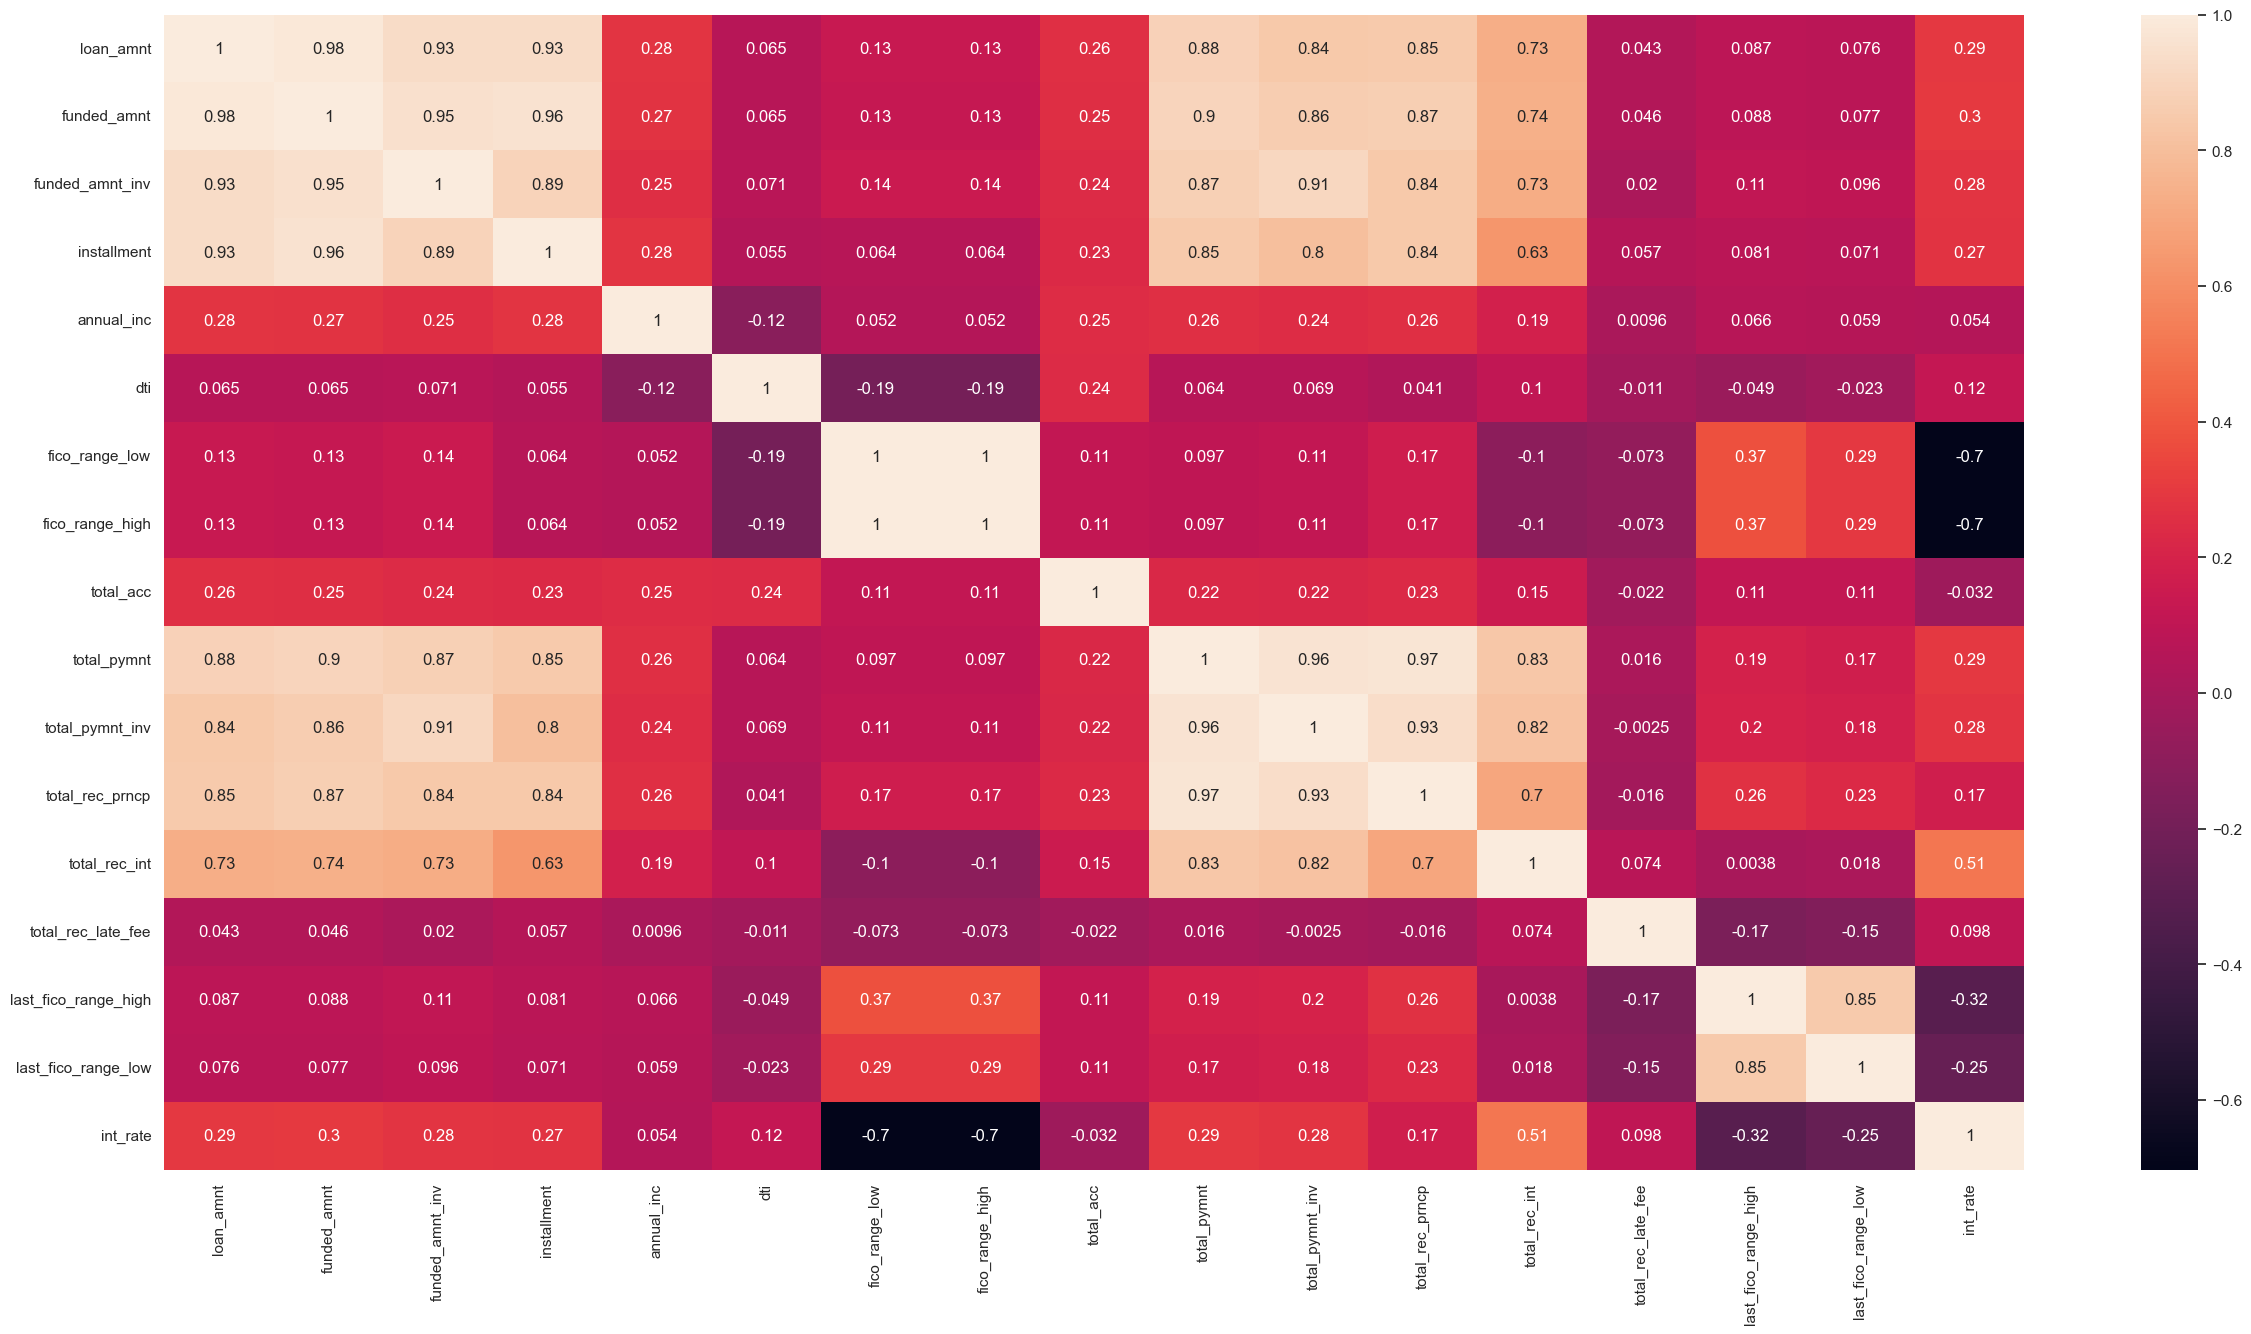

In [35]:
plt.figure(figsize=(30,15))
sns.heatmap(numericcols.corr(),annot=True)
plt.show()

In [36]:
#removing funded_amt because of multicollinearity
numericcols=numericcols.drop(["funded_amnt","total_rec_prncp","total_pymnt_inv"],axis=1)

In [37]:
# scaling of numeric columns
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler=MinMaxScaler()

In [39]:
numeric_scaled=scaler.fit_transform(numericcols)

In [40]:
numeric_scaled=pd.DataFrame(numeric_scaled,columns=numericcols.columns[0:14])

In [41]:
numeric_scaled.head()

loan_amnt  funded_amnt_inv  installment  annual_inc       dti  \
0   0.130435         0.142143     0.114151    0.003685  0.921974   
1   0.057971         0.071429     0.034245    0.004685  0.033344   
2   0.055072         0.068571     0.053245    0.001727  0.290764   
3   0.275362         0.285714     0.250977    0.007886  0.666889   
4   0.072464         0.085714     0.040418    0.013021  0.598199   

   fico_range_low  fico_range_high  total_acc  total_pymnt  total_rec_int  \
0        0.581395         0.581395   0.089888     0.100116       0.036231   
1        0.604651         0.604651   0.033708     0.017224       0.018266   
2        0.581395         0.581395   0.101124     0.051323       0.025423   
3        0.372093         0.372093   0.404494     0.208865       0.092971   
4        0.395349         0.395349   0.415730     0.064622       0.044295   

   total_rec_late_fee  last_fico_range_high  last_fico_range_low  int_rate  
0            0.000000              0.875294             0.875740  0.272822  
1            0.000000              0.587059             0.000000  0.513824  
2            0.000000              0.845882             0.846154  0.549817  
3            0.081196              0.710588             0.710059  0.420970  
4            0.000000              0.816471             0.816568  0.379238

In [42]:
numericcols["loan_status"]=objectcols.loan_status

In [43]:
objectcols=objectcols.drop("loan_status",axis=1)

In [44]:
# label encoding object cols
from sklearn.preprocessing import LabelEncoder

In [45]:
le=LabelEncoder()

In [46]:
objectcols_encode=objectcols.apply(le.fit_transform)

In [47]:
objectcols_encode.head()

term  grade  sub_grade  emp_length  home_ownership  verification_status  \
0     0      1          6           1               4                    2   
1     1      2         13          10               4                    1   
2     0      2         14           1               4                    0   
3     0      2         10           1               4                    1   
4     1      1          9           0               4                    1   

   issue_d  purpose  
0       13        1  
1       13        0  
2       13       11  
3       13        9  
4       13        9

In [48]:
lending_clean=pd.concat([numeric_scaled,objectcols_encode],axis=1)

In [49]:
lending_clean["loan_status"]=numericcols.loan_status

In [50]:
lending_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42538 non-null  float64
 1   funded_amnt_inv       42538 non-null  float64
 2   installment           42538 non-null  float64
 3   annual_inc            42538 non-null  float64
 4   dti                   42538 non-null  float64
 5   fico_range_low        42538 non-null  float64
 6   fico_range_high       42538 non-null  float64
 7   total_acc             42538 non-null  float64
 8   total_pymnt           42538 non-null  float64
 9   total_rec_int         42538 non-null  float64
 10  total_rec_late_fee    42538 non-null  float64
 11  last_fico_range_high  42538 non-null  float64
 12  last_fico_range_low   42538 non-null  float64
 13  int_rate              42538 non-null  float64
 14  term                  42538 non-null  int32  
 15  grade              

In [51]:
lending_clean.loan_status.value_counts()

Fully Paid                                             33589
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [52]:
lending_clean.loan_status=lending_clean.loan_status.replace("Does not meet the credit policy. Status:Fully Paid","Fully Paid")

In [53]:
lending_clean.loan_status=lending_clean.loan_status.replace("Does not meet the credit policy. Status:Charged Off","Charged Off")

In [54]:
lending_clean.loan_status=lending_clean.loan_status.replace("Late (31-120 days)","In Grace Period")

In [55]:
lending_clean.loan_status=lending_clean.loan_status.replace("Late (16-30 days)","In Grace Period")

In [56]:
lending_clean.loan_status=lending_clean.loan_status.replace("In Grace Period","Late")

In [57]:
lending_clean.loan_status.value_counts()

Fully Paid     35577
Charged Off     6414
Current          513
Late              33
Default            1
Name: loan_status, dtype: int64

In [58]:
lending_clean_model=lending_clean.copy()

In [59]:
target_loan= ["Fully Paid","Charged Off"]
lending_clean_model=lending_clean_model[lending_clean_model["loan_status"].isin(target_loan)]

In [60]:
lending_clean_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41991 entries, 0 to 42537
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             41991 non-null  float64
 1   funded_amnt_inv       41991 non-null  float64
 2   installment           41991 non-null  float64
 3   annual_inc            41991 non-null  float64
 4   dti                   41991 non-null  float64
 5   fico_range_low        41991 non-null  float64
 6   fico_range_high       41991 non-null  float64
 7   total_acc             41991 non-null  float64
 8   total_pymnt           41991 non-null  float64
 9   total_rec_int         41991 non-null  float64
 10  total_rec_late_fee    41991 non-null  float64
 11  last_fico_range_high  41991 non-null  float64
 12  last_fico_range_low   41991 non-null  float64
 13  int_rate              41991 non-null  float64
 14  term                  41991 non-null  int32  
 15  grade              

In [61]:
lending_clean_model['loan_status'] = lending_clean_model.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [62]:
# splitting data into X and y for feature engineering and model building
y=lending_clean_model.loan_status
X=lending_clean_model.drop("loan_status",axis=1)

In [63]:
y.value_counts()

1    35577
0     6414
Name: loan_status, dtype: int64

<Axes: >

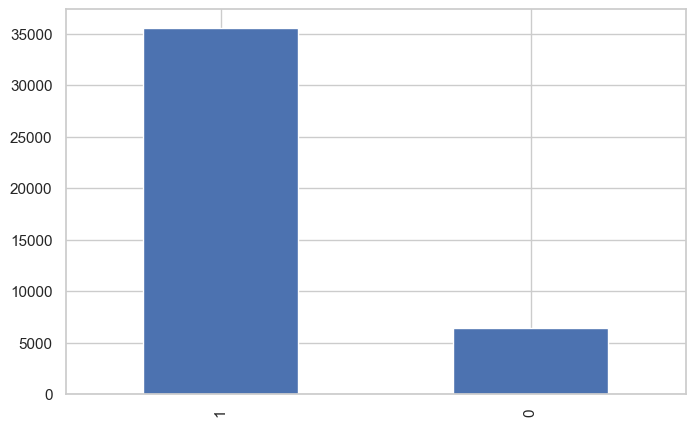

In [64]:
y.value_counts().plot(kind="bar")  # IMBALANCE DATA 

In [65]:
# feature engineering

In [66]:
from imblearn.over_sampling import BorderlineSMOTE

In [67]:
smote_border = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_smoteborder, y_smoteborder = smote_border.fit_resample(
X,y)

In [68]:
y_smoteborder.value_counts()

1    35577
0    35576
Name: loan_status, dtype: int64

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
tree=DecisionTreeClassifier(max_depth=8)

In [71]:
treemodel=tree.fit(X_smoteborder, y_smoteborder)

In [72]:
treemodel.score(X_smoteborder,y_smoteborder)

0.9227017834806684

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
cross_val_score(tree,X_smoteborder,y_smoteborder)

array([0.89775841, 0.93886586, 0.93935774, 0.89472944, 0.83689389])

In [75]:
pd.DataFrame(treemodel.feature_importances_,X_smoteborder.columns).sort_values(by=0,ascending=False)

0
last_fico_range_low   0.616048
total_pymnt           0.144632
loan_amnt             0.120795
last_fico_range_high  0.047310
total_rec_int         0.024515
total_rec_late_fee    0.024227
installment           0.018489
dti                   0.000862
int_rate              0.000793
term                  0.000591
funded_amnt_inv       0.000435
issue_d               0.000364
purpose               0.000284
grade                 0.000205
fico_range_high       0.000189
sub_grade             0.000111
fico_range_low        0.000085
emp_length            0.000065
annual_inc            0.000000
total_acc             0.000000
home_ownership        0.000000
verification_status   0.000000

In [76]:
# the columns with 0 importance are removed
lending_clean_model=lending_clean_model.drop(["annual_inc","total_acc","home_ownership","verification_status"],axis=1)


In [77]:
y=lending_clean_model.loan_status
X=lending_clean_model.drop("loan_status",axis=1)

In [78]:
y.value_counts()

1    35577
0     6414
Name: loan_status, dtype: int64

In [79]:
smote_border = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_smoteborder, y_smoteborder = smote_border.fit_resample(
X,y)

In [80]:
y_smoteborder.value_counts()

1    35577
0    35576
Name: loan_status, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31493, 18), (10498, 18), (31493,), (10498,))

In [82]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [83]:
logit=LogisticRegression(max_iter=1500)

In [84]:
logitmodel=logit.fit(X_smoteborder,y_smoteborder)

In [85]:
logitmodel.score(X_smoteborder,y_smoteborder)

0.942433910024876

In [86]:
cross_val_score(logit,X_smoteborder,y_smoteborder)

array([0.92790387, 0.96029794, 0.96071956, 0.91644413, 0.88706957])

In [87]:
np.mean(cross_val_score(logit,X_smoteborder,y_smoteborder))

0.9304870144572194

In [88]:
logitpredict=logit.predict(X_smoteborder)

In [89]:
print(classification_report(y_smoteborder,logitpredict))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     35576
           1       0.93      0.96      0.94     35577

    accuracy                           0.94     71153
   macro avg       0.94      0.94      0.94     71153
weighted avg       0.94      0.94      0.94     71153



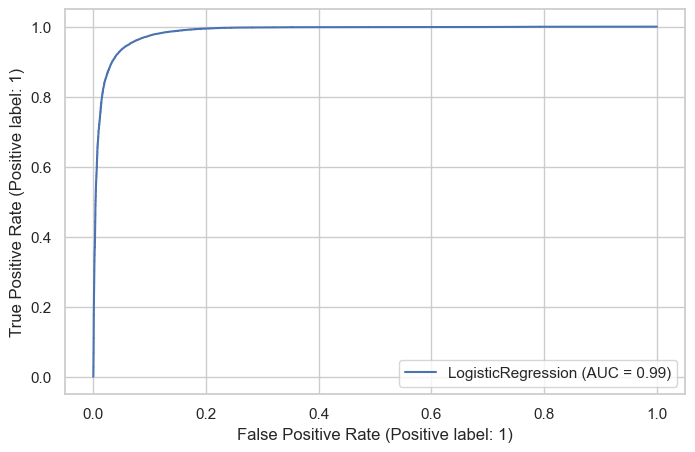

In [90]:
RocCurveDisplay.from_estimator(logit,X_smoteborder,y_smoteborder)

In [91]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

In [92]:
tree=DecisionTreeClassifier(max_depth=8)

In [93]:
treemodel=tree.fit(X_smoteborder,y_smoteborder)

In [94]:
treemodel.fit(X_smoteborder,y_smoteborder)

DecisionTreeClassifier(max_depth=8)

In [95]:
treemodel.score(X_smoteborder,y_smoteborder)

0.9291667252259216

In [96]:
cross_val_score(tree,X_smoteborder,y_smoteborder)

array([0.90555829, 0.94568196, 0.94596304, 0.90386507, 0.82614195])

In [97]:
np.mean(cross_val_score(tree,X_smoteborder,y_smoteborder))

0.9063696779466482

In [98]:
treepredict=tree.predict(X_smoteborder)

In [99]:
print(classification_report(y_smoteborder,treepredict))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     35576
           1       0.92      0.94      0.93     35577

    accuracy                           0.93     71153
   macro avg       0.93      0.93      0.93     71153
weighted avg       0.93      0.93      0.93     71153



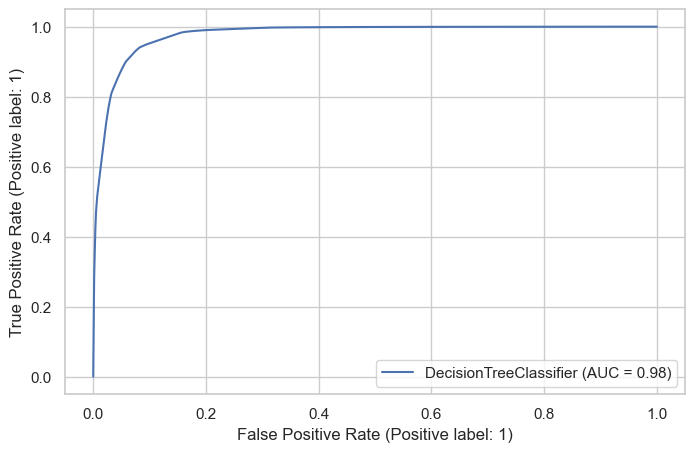

In [100]:
RocCurveDisplay.from_estimator(tree,X_smoteborder,y_smoteborder)

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
gb=GradientBoostingClassifier()

In [103]:
gbmodel=gb.fit(X_smoteborder,y_smoteborder)

In [104]:
gbmodel.score(X_smoteborder,y_smoteborder)

0.9648925554790382

In [105]:
cross_val_score(gb,X_smoteborder,y_smoteborder)

array([0.93219029, 0.97477338, 0.97849765, 0.94546732, 0.90899508])

In [106]:
np.mean(cross_val_score(gb,X_smoteborder,y_smoteborder))

0.9479847440433332

In [107]:
gbpredict=gb.predict(X_smoteborder)

In [108]:
print(classification_report(y_smoteborder,gbpredict))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     35576
           1       0.95      0.98      0.97     35577

    accuracy                           0.96     71153
   macro avg       0.97      0.96      0.96     71153
weighted avg       0.97      0.96      0.96     71153



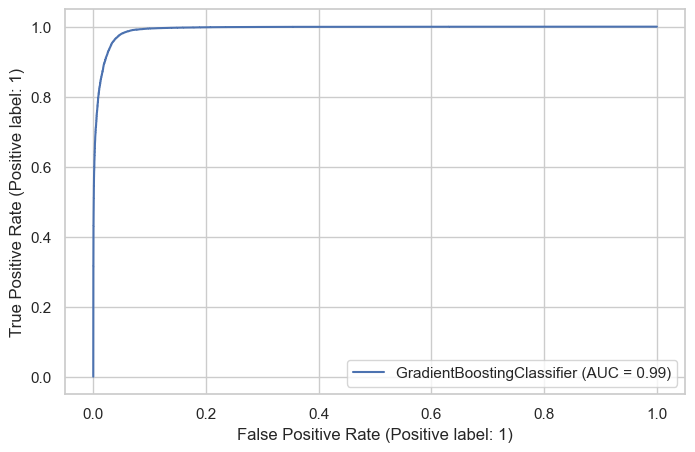

In [109]:
RocCurveDisplay.from_estimator(gb,X_smoteborder,y_smoteborder)

In [110]:
# knn model
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knc=KNeighborsClassifier(n_neighbors=5)

In [112]:
kncmodel=knc.fit(X_smoteborder,y_smoteborder)

In [113]:
kncmodel.score(X_smoteborder,y_smoteborder)

0.8530631175073433

In [114]:
cross_val_score(knc,X_smoteborder,y_smoteborder)

array([0.56826646, 0.63551402, 0.64612466, 0.62747716, 0.56528461])

In [115]:
np.mean(cross_val_score(knc,X_smoteborder,y_smoteborder))

0.608533381515999

In [116]:
kncpredict=knc.predict(X_smoteborder)

In [117]:
print(classification_report(y_smoteborder,kncpredict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     35576
           1       0.88      0.81      0.85     35577

    accuracy                           0.85     71153
   macro avg       0.86      0.85      0.85     71153
weighted avg       0.86      0.85      0.85     71153



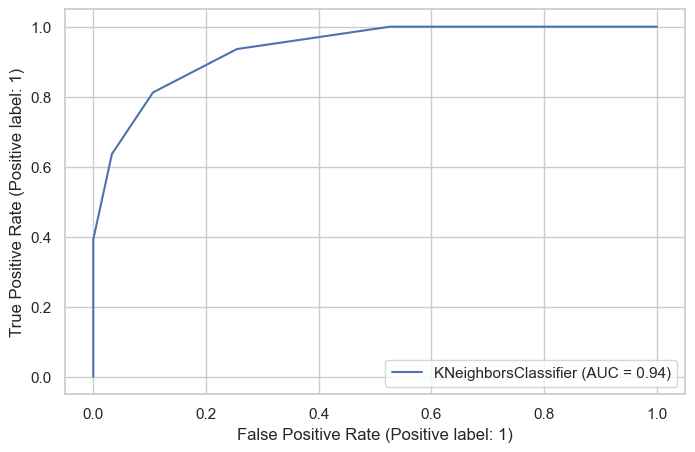

In [118]:
RocCurveDisplay.from_estimator(knc,X_smoteborder,y_smoteborder)

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
nb=GaussianNB()

In [121]:
nbmodel=nb.fit(X_smoteborder,y_smoteborder)

In [122]:
nbmodel.score(X_smoteborder,y_smoteborder)

0.7846893314406982

In [123]:
cross_val_score(nb,X_smoteborder,y_smoteborder)

array([0.79333849, 0.83121355, 0.82910547, 0.75382994, 0.67962052])

In [124]:
np.mean(cross_val_score(nb,X_smoteborder,y_smoteborder))

0.777421593007614

In [125]:
nbpredict=nb.predict(X_smoteborder)

In [126]:
print(classification_report(y_smoteborder,nbpredict))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78     35576
           1       0.77      0.80      0.79     35577

    accuracy                           0.78     71153
   macro avg       0.79      0.78      0.78     71153
weighted avg       0.79      0.78      0.78     71153



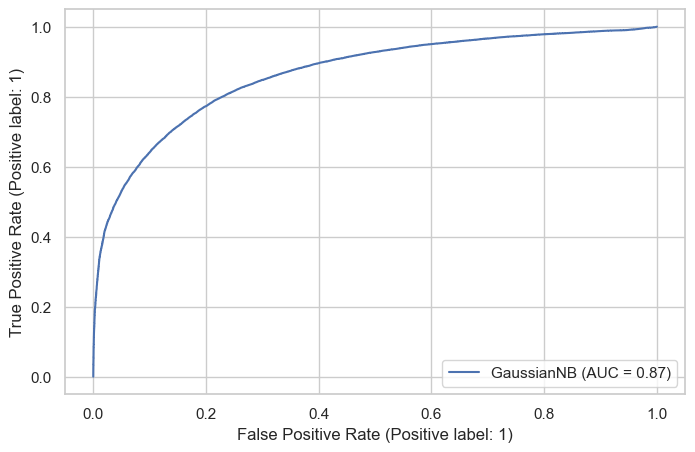

In [127]:
RocCurveDisplay.from_estimator(nb,X_smoteborder,y_smoteborder)

In [128]:
from sklearn.svm import SVC

In [129]:
svc=SVC()

In [130]:
svcmodel=svc.fit(X_smoteborder,y_smoteborder)

In [131]:
svcmodel.score(X_smoteborder,y_smoteborder)

0.8132053462257389

In [132]:
svcpredict=svc.predict(X_smoteborder)

In [133]:
print(classification_report(y_smoteborder,svcpredict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82     35576
           1       0.83      0.79      0.81     35577

    accuracy                           0.81     71153
   macro avg       0.81      0.81      0.81     71153
weighted avg       0.81      0.81      0.81     71153



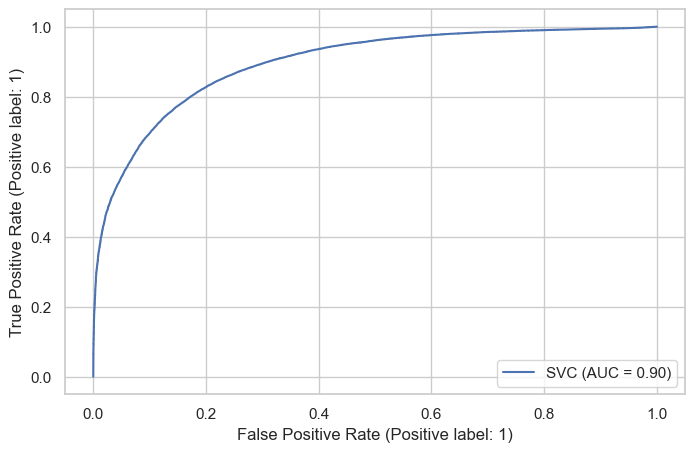

In [134]:
RocCurveDisplay.from_estimator(svc,X_smoteborder,y_smoteborder)